# Import Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Business Problem

SyriaTel, a telecommunications company, is interested in knowing the important factors in determining whether or not a customer will stay with the company. Using customer account data, this notebook will provide classification models aimed at predicting churn.   

# Load Data

In [2]:
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Data Cleaning

In [5]:
updated_columns = []
for c in df.columns:
    updated_columns.append(c.replace(' ', '_'))
df.columns = updated_columns
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [6]:
#Convert area_code column to object 
df['area_code'] = df.area_code.astype(object)

In [7]:
#Drop phone_number column from the dataframe
df_filtered = df.drop(['phone_number'], axis=1)

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

## Check Distributions

In [9]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

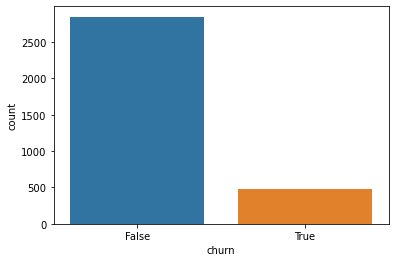

In [10]:
sns.countplot(x='churn', data=df)

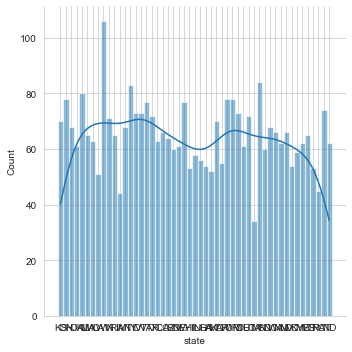

In [11]:
sns.set_style('whitegrid')
sns.displot(x=df_filtered['state'],kind='hist',kde=True);

In [12]:
df_filtered.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

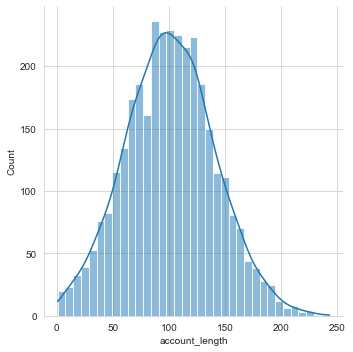

In [13]:
sns.displot(x=df_filtered['account_length'],kind='hist', kde=True);

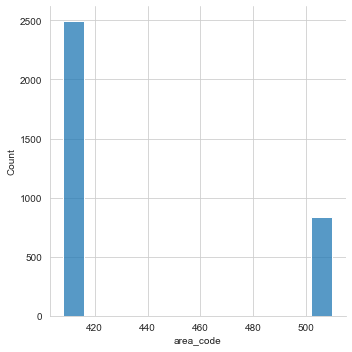

In [14]:
sns.displot(x=df_filtered['area_code'],kind='hist');

In [15]:
df_filtered.area_code.unique()

array([415, 408, 510], dtype=object)

In [16]:
df_filtered.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

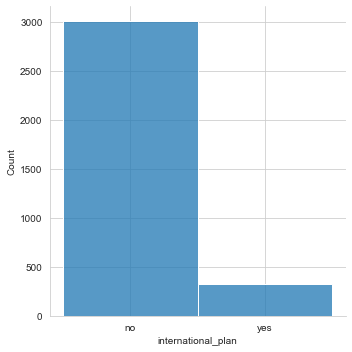

In [17]:
sns.displot(x=df_filtered['international_plan'],kind='hist');

<AxesSubplot:xlabel='churn', ylabel='count'>

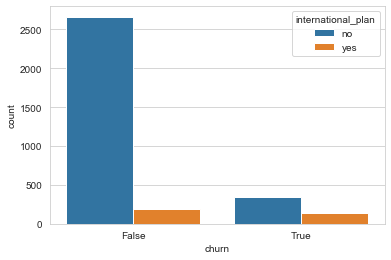

In [18]:
sns.countplot(x='churn', hue='international_plan', data=df)

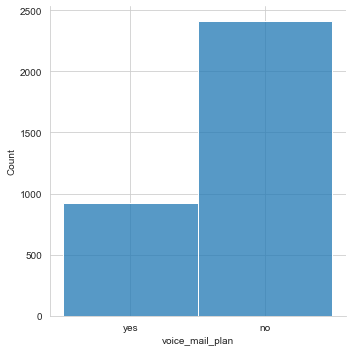

In [19]:
sns.displot(x=df_filtered['voice_mail_plan'],kind='hist');

<AxesSubplot:xlabel='churn', ylabel='count'>

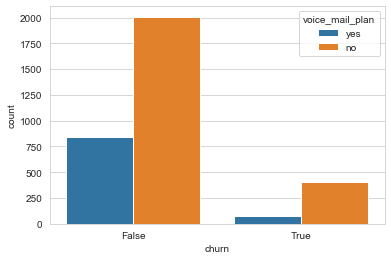

In [20]:
sns.countplot(x='churn', hue='voice_mail_plan', data=df)

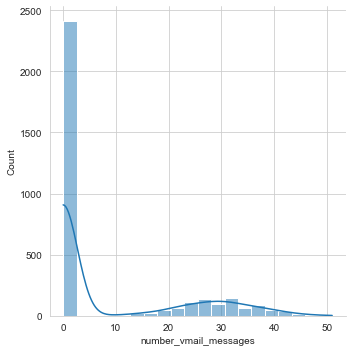

In [21]:
sns.displot(x=df_filtered['number_vmail_messages'],kind='hist',kde=True);

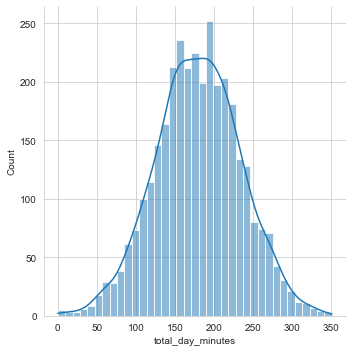

In [22]:
sns.displot(x=df_filtered['total_day_minutes'],kind='hist',kde=True);

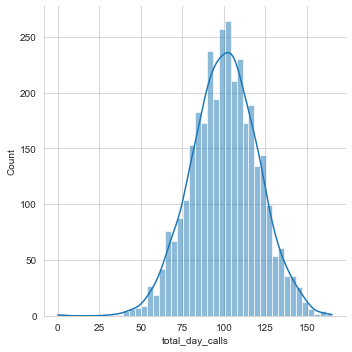

In [23]:
sns.displot(x=df_filtered['total_day_calls'],kind='hist',kde=True);

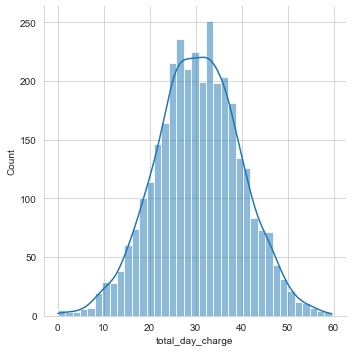

In [24]:
sns.displot(x=df_filtered['total_day_charge'],kind='hist',kde=True);

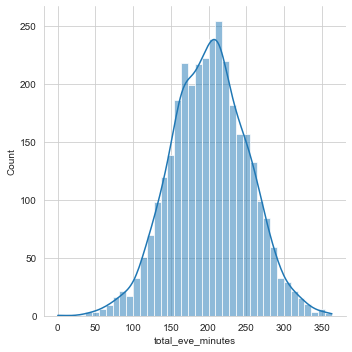

In [25]:
sns.displot(x=df_filtered['total_eve_minutes'],kind='hist',kde=True);

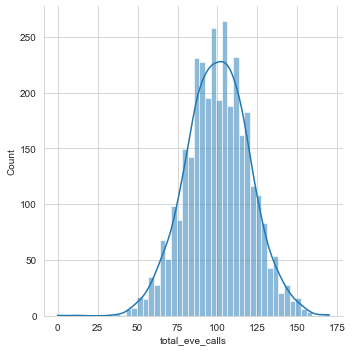

In [26]:
sns.displot(x=df_filtered['total_eve_calls'],kind='hist',kde=True);

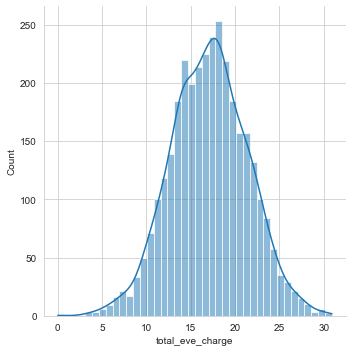

In [27]:
sns.displot(x=df_filtered['total_eve_charge'],kind='hist',kde=True);

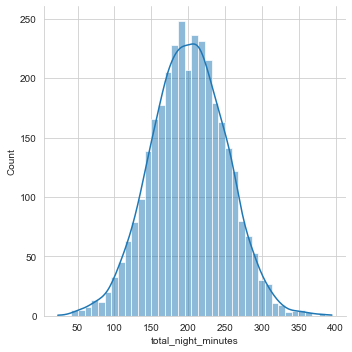

In [28]:
sns.displot(x=df_filtered['total_night_minutes'],kind='hist',kde=True);

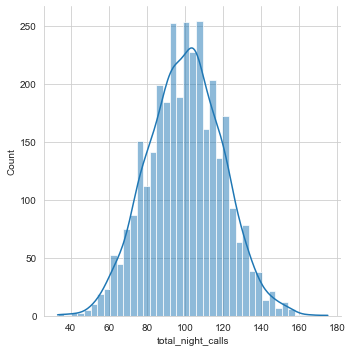

In [29]:
sns.displot(x=df_filtered['total_night_calls'],kind='hist',kde=True);

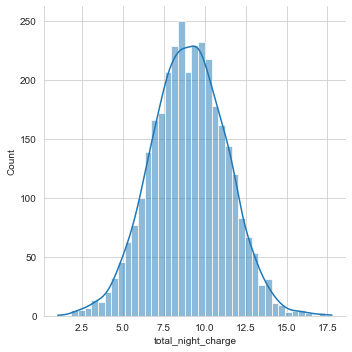

In [30]:
sns.displot(x=df_filtered['total_night_charge'],kind='hist',kde=True);

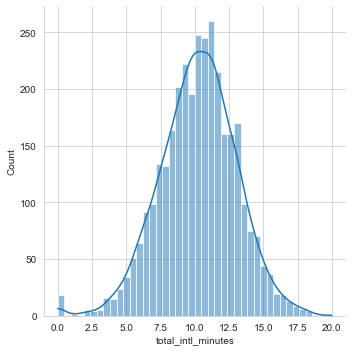

In [31]:
sns.displot(x=df_filtered['total_intl_minutes'],kind='hist',kde=True);

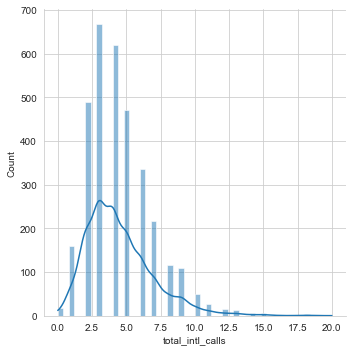

In [32]:
sns.displot(x=df_filtered['total_intl_calls'],kind='hist',kde=True);

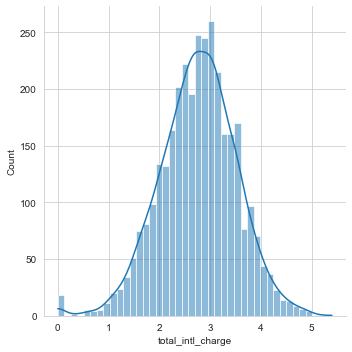

In [33]:
sns.displot(x=df_filtered['total_intl_charge'],kind='hist',kde=True);

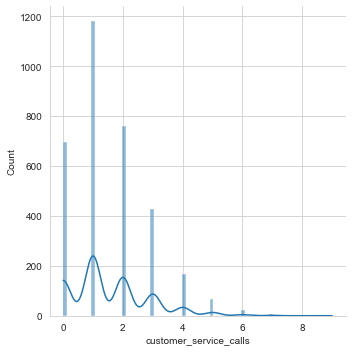

In [34]:
sns.displot(x=df_filtered['customer_service_calls'],kind='hist',kde=True);

## Pivot Table - Feature Averages

In [35]:
pd.pivot_table(df_filtered, index='churn', values=['account_length', 'number_vmail_messages', 'total_day_minutes',
                                                  'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                                                  'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                                                  'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                                                  'total_intl_calls', 'total_intl_charge', 'customer_service_calls'])

,account_length,customer_service_calls,number_vmail_messages,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes
churn,,,,,,,,,,,,,,,
False,100.793684,1.449825,8.604561,100.283158,29.780421,175.175754,100.038596,16.918909,199.043298,4.532982,2.743404,10.158877,100.058246,9.006074,200.133193
True,102.664596,2.229814,5.115942,101.335404,35.175921,206.914079,100.561077,18.054969,212.410145,4.163561,2.889545,10.700000,100.399586,9.235528,205.231677


## Check for Multicollinearity

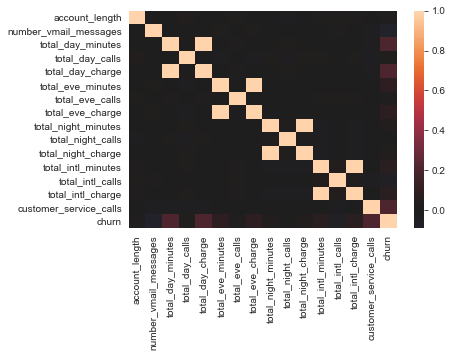

In [36]:
sns.heatmap(df_filtered.corr(), center=0);

In [37]:
df_filtered_2 = df_filtered.drop(['total_day_calls', 'total_day_minutes',
                                 'total_night_calls', 'total_night_minutes',
                                 'total_eve_calls', 'total_eve_minutes',
                                 'total_intl_calls', 'total_intl_minutes'], axis=1)
df_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_charge        3333 non-null   float64
 7   total_eve_charge        3333 non-null   float64
 8   total_night_charge      3333 non-null   float64
 9   total_intl_charge       3333 non-null   float64
 10  customer_service_calls  3333 non-null   int64  
 11  churn                   3333 non-null   bool   
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 289.8+ KB


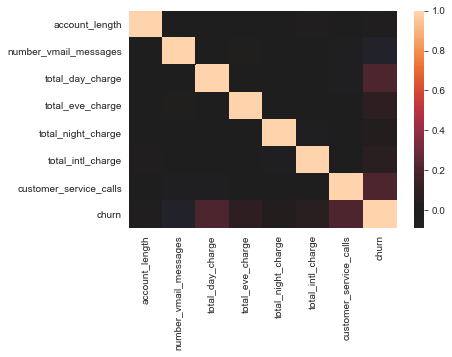

In [38]:
sns.heatmap(df_filtered_2.corr(), center=0);

## Convert Categorical Features

In [39]:
state_dummies = pd.get_dummies(df_filtered_2['state'], prefix='state', drop_first=True, dtype=float)

In [40]:
intl_plan_dummies = pd.get_dummies(df_filtered_2['international_plan'], prefix='intl', drop_first=True, dtype=float)

In [41]:
vm_plan_dummies = pd.get_dummies(df_filtered_2['voice_mail_plan'], prefix='vm', drop_first=True, dtype=float)

In [42]:
df_updated = df_filtered_2.drop(['state', 'international_plan', 'voice_mail_plan'], axis=1)

In [43]:
df_updated_2 = pd.concat([df_updated, intl_plan_dummies, vm_plan_dummies], axis=1)
df_updated_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   object 
 2   number_vmail_messages   3333 non-null   int64  
 3   total_day_charge        3333 non-null   float64
 4   total_eve_charge        3333 non-null   float64
 5   total_night_charge      3333 non-null   float64
 6   total_intl_charge       3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   churn                   3333 non-null   bool   
 9   intl_yes                3333 non-null   float64
 10  vm_yes                  3333 non-null   float64
dtypes: bool(1), float64(6), int64(3), object(1)
memory usage: 263.8+ KB


## Feature Engineering

In [44]:
total_charge = df_updated_2['total_day_charge'] + df_updated_2['total_eve_charge'] + df_updated_2['total_night_charge'] + df_updated_2['total_intl_charge']
df_updated_2['total_charge'] = total_charge
df_updated_2.head()

,account_length,area_code,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn,intl_yes,vm_yes,total_charge
0,128,415,25,45.07,16.78,11.01,2.70,1,False,0.0,1.0,75.56
1,107,415,26,27.47,16.62,11.45,3.70,1,False,0.0,1.0,59.24
2,137,415,0,41.38,10.30,7.32,3.29,0,False,0.0,0.0,62.29
3,84,408,0,50.90,5.26,8.86,1.78,2,False,1.0,0.0,66.80
4,75,415,0,28.34,12.61,8.41,2.73,3,False,1.0,0.0,52.09


In [45]:
pd.pivot_table(df_updated_2, index='churn', values='total_charge')

,total_charge
churn,
False,58.448807
True,65.355963


# Modeling

## Model A - Statsmodel

In [68]:
features_a = df_updated_2.drop(['churn', 'area_code'], axis=1)
target_a = pd.get_dummies(df_updated_2['churn'], drop_first=True, dtype=float)

In [69]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(features_a, target_a, random_state=42)

In [70]:
from sklearn import preprocessing
scaler_a = preprocessing.StandardScaler().fit(X)
scaler_a

StandardScaler()

In [71]:
X_scaled_train_a = scaler_a.transform(X_train_a)

In [72]:
X_scaled_test_a = scaler_a.transform(X_test_a)

In [73]:
import statsmodels.api as sm
X = sm.add_constant(X_scaled_train_a)
logit_model=sm.Logit(y_train_b, X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.327015
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                   True   No. Observations:                 2499
Model:                          Logit   Df Residuals:                     2489
Method:                           MLE   Df Model:                            9
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.2040
Time:                        15:58:16   Log-Likelihood:                -817.21
converged:                       True   LL-Null:                       -1026.7
Covariance Type:            nonrobust   LLR p-value:                 1.252e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2825      0.081    -28.268      0.000      -2.441      -2.124
x1             0.0191      0

## Model B - Logistic Regression Model

In [74]:
features_b = df_updated_2.drop(['churn', 'area_code'], axis=1)
target_b = pd.get_dummies(df_updated_2['churn'], drop_first=True, dtype=float)

In [75]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(features_b, target_b, random_state=42)

In [76]:
scaler_b = preprocessing.StandardScaler().fit(X_train_b)
scaler_b

StandardScaler()

In [77]:
X_scaled_train_b = scaler_b.transform(X_train_b)

In [78]:
X_scaled_test_b = scaler_b.transform(X_test_b)

In [79]:
model_b = LogisticRegression(solver='liblinear', class_weight='balanced')

In [80]:
model_b.fit(X_scaled_train_b, y_train_b.values.ravel())

LogisticRegression(class_weight='balanced', solver='liblinear')

In [81]:
model_b.coef_

array([[ 0.04592608,  0.24467874,  0.31610039,  0.14471429,  0.08088134,
         0.18015806,  0.77351466,  0.71591678, -0.60363199,  0.36993991]])

In [82]:
model_b.predict_proba(X_scaled_test_b)

array([[0.54417241, 0.45582759],
       [0.88885114, 0.11114886],
       [0.86582763, 0.13417237],
       ...,
       [0.8437516 , 0.1562484 ],
       [0.87272465, 0.12727535],
       [0.84962706, 0.15037294]])

In [83]:
y_pred_b = model_b.predict(X_scaled_test_b)

In [84]:
conf_mx = confusion_matrix(y_test_b, y_pred_b)
conf_mx

array([[559, 150],
       [ 25, 100]])

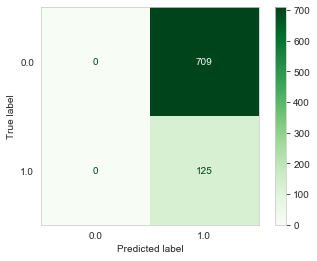

In [85]:
plot_confusion_matrix(model_b, X_test_b, y_test_b, cmap='Greens')
plt.grid(False)

In [86]:
print(classification_report(y_test_b, model_b.predict(X_test_b)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       709
         1.0       0.15      1.00      0.26       125

    accuracy                           0.15       834
   macro avg       0.07      0.50      0.13       834
weighted avg       0.02      0.15      0.04       834



/Users/justing/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
y_score = model_b.fit(X_train_b, y_train_b.values.ravel()).decision_function(X_test_b)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [103]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.836332863187588


AUC: 0.836332863187588


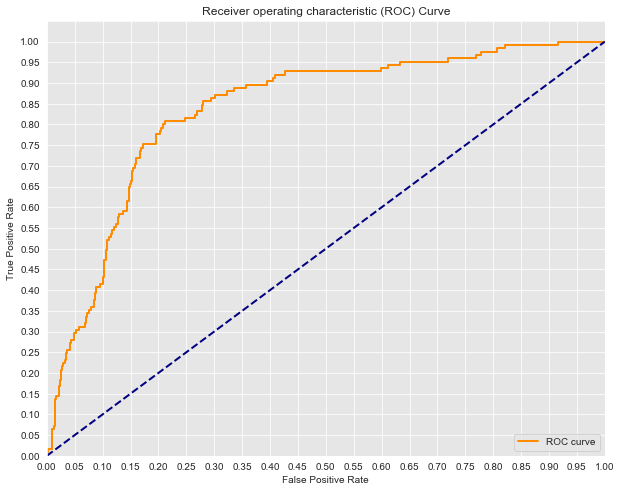

In [105]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Model C - Decesion Tree

In [87]:
features_c = df_updated_2.drop(['churn', 'area_code'], axis=1)
target_c = pd.get_dummies(df_updated_2['churn'], drop_first=True, dtype=float)

In [89]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    features_c, target_c, random_state=42)

In [90]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train_c, y_train_c) 

DecisionTreeClassifier(random_state=10)

In [92]:
y_pred_c = classifier.predict(X_test_c) 

In [93]:
acc = accuracy_score(y_test_c ,y_pred_c) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :93.4052757793765


In [96]:
print('Confusion Matrix:')
cnf_matrix = confusion_matrix(y_test_c, y_pred_c)
print(cnf_matrix)

Confusion Matrix:
[[680  29]
 [ 26  99]]


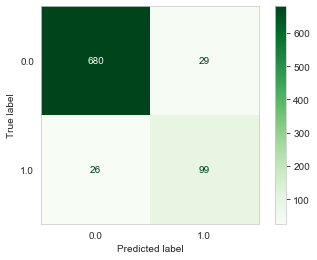

In [98]:
plot_confusion_matrix(classifier, X_test_c, y_test_c, cmap=plt.cm.Greens)
plt.grid(False)

In [106]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_c, y_pred_c)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.88


In [99]:
classifier_2 = DecisionTreeClassifier(max_depth=3, random_state=10, criterion='entropy')  
classifier_2.fit(X_train_c, y_train_c)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [100]:
plt.figure(figsize=(20,8))
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1440x576 with 0 Axes>

In [108]:
from pydotplus import graph_from_dot_data

ModuleNotFoundError: No module named 'pydotplus'

## Model D - Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_updated_2.drop(['churn', 'area_code'], axis=1), 
                                                    df_updated_2['churn'], random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

In [ ]:
fig, ax = plt.subplots()

ax.barh(width=forest.feature_importances_, y=X_train.columns)
fig.tight_layout()

In [ ]:
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred_test))

## Model E - Support Vector Machine